In [ ]:
import robot_color_tracking as track
import time
import numpy as np

#tracker = track.GeometricTrack(areaBounds = (200, 20000),binaryThreshold= 70, segmentMethod='multipleColors', color=['red', 'yellow', 'blue', 'green'] , debug=True)
#tracker = track.HoughColorTrack(binaryThreshold = 80, hueTolerance = 10, debug=True, nbr_colors=4)
#tracker = track.ColorTrack(binaryThreshold = 80, hueTolerance = 70,kernel = np.ones((10,10)), nbr_colors=4)
#track.GeometricTrack(areaBounds = (200, 20000),binaryThreshold= 70, segmentMethod='multipleColors', color=['red', 'yellow', 'blue', 'green'] , debug=True)

inicio = time.time()
tracker = tracker = track.ColorTrack(binaryThreshold = 80, hueTolerance = 10,kernel = np.ones((5,5)), nbr_colors=4)
tracker.track('../img/shapes_colors/IMG_20200923_192942789.jpg')
fim = time.time()
print(fim - inicio)

tracker.printRobotLocation()

In [ ]:
tracker.printSegmentedImage()

In [1]:
import cv2
from os import listdir
from os.path import isfile, join
import json

#Algoritmo para pegar a posição dos objetos

def capturePosition(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img,(x,y),100,(255,0,0),-1)
        print("img: "+img_name+"\nobject: "+str(i)+"\nx: "+str(x)+"\ny: "+str(y))
        data[img_name][i].append([x,y])

        
#onlyfiles = [f for f in listdir('../img/colors/') if isfile(join('../img', f))]
onlyfiles = listdir('../img/shapes_one_color/')
#print(onlyfiles)
data = {}
labels = ['triangle', 'square', 'pentagon', 'circle']

for f in onlyfiles:
    i=0
    img_name = f
    data[img_name] = [[],[],[],[]]
    for i in range(4):
        img = cv2.imread('../img/shapes_one_color/'+img_name)
        cv2.namedWindow(labels[i], cv2.WINDOW_NORMAL)
        cv2.imshow(labels[i], img)
        cv2.resizeWindow(labels[i], 600, 600)
        cv2.setMouseCallback(labels[i],capturePosition)
        cv2.waitKey(0)
        cv2.destroyAllWindows()


with open('../algorithm_performance_data/real_positions/shapes_one_color_position.json', 'w') as outfile:
    json.dump(data, outfile)

img: IMG_20201004_210948858.jpg
object: 0
x: 1414
y: 1421
img: IMG_20201004_210948858.jpg
object: 1
x: 2918
y: 2697
img: IMG_20201004_210948858.jpg
object: 2
x: 2426
y: 1213
img: IMG_20201004_210948858.jpg
object: 3
x: 1657
y: 2600
img: IMG_20201004_211129520_BURST000_COVER_TOP.jpg
object: 0
x: 2988
y: 1878
img: IMG_20201004_211129520_BURST000_COVER_TOP.jpg
object: 1
x: 1421
y: 1913
img: IMG_20201004_211129520_BURST000_COVER_TOP.jpg
object: 2
x: 2267
y: 1989
img: IMG_20201004_211129520_BURST000_COVER_TOP.jpg
object: 3
x: 2364
y: 1275
img: IMG_20201004_211239552.jpg
object: 0
x: 1449
y: 1227
img: IMG_20201004_211239552.jpg
object: 1
x: 3009
y: 1913
img: IMG_20201004_211239552.jpg
object: 2
x: 2315
y: 610
img: IMG_20201004_211239552.jpg
object: 3
x: 2100
y: 2752
img: IMG_20201004_211546025.jpg
object: 0
x: 2496
y: 1324
img: IMG_20201004_211546025.jpg
object: 1
x: 1781
y: 1754
img: IMG_20201004_211546025.jpg
object: 2
x: 2086
y: 700
img: IMG_20201004_211546025.jpg
object: 3
x: 1511
y: 116

In [1]:
import cv2
from os import listdir
from os.path import isfile, join
import json

#teste 1 imagem

def capturePosition(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        print("img: "+img_name+"\nobject: "+str(i)+"\nx: "+str(x)+"\ny: "+str(y))
        data[img_name][i].append([x,y])


i=0
data = {}
img_name = 'IMG_20200923_193637993.jpg'
data[img_name] = [[],[],[],[]]
for i in range(4):
    img = cv2.imread('../img/shapes_colors/'+img_name)
    cv2.namedWindow('image', cv2.WINDOW_NORMAL)
    cv2.imshow('image', img)
    cv2.resizeWindow('image', 600, 600)
    cv2.setMouseCallback('image',capturePosition)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

img: IMG_20200923_193637993.jpg
object: 0
x: 1282
y: 1726
img: IMG_20200923_193637993.jpg
object: 0
x: 2190
y: 859
img: IMG_20200923_193637993.jpg
object: 0
x: 2939
y: 1379
img: IMG_20200923_193637993.jpg
object: 0
x: 3050
y: 2329


In [1]:
# statisticas

import robot_color_tracking as track
import numpy as np
import json

# Compara o erro entre o resultado esperado e o erro encontrado
methods = [ 'shapes_one_color','shapes','shapes_colors','colors_naive','colors'] # 
timeOfTrack = {}
for m in methods:
    if m == 'shapes':
        tracker = track.GeometricTrack(binaryThreshold= 140, segmentMethod='simple')
    elif m == 'colors_naive':
        tracker = track.ColorTrack(binaryThreshold = 80, hueTolerance = 10,kernel = np.ones((10,10)), nbr_colors=4)
    elif m == 'shapes_colors':
        tracker = track.GeometricTrack(areaBounds = (200, 20000),binaryThreshold= 70, segmentMethod='multipleColors', color=['red', 'yellow', 'blue', 'green'])
    elif m == 'colors':
        tracker = track.ColorTrack(binaryThreshold = 80, hueTolerance = 10, nbr_colors=4)
    elif m == 'shapes_one_color':
        tracker = track.GeometricTrack(areaBounds = (200, 20000),binaryThreshold= 70, segmentMethod='oneColors', color='red')


    data = {}
    error = [{},{},{},{}]
    e = 0
    with open('../algorithm_performance_data/real_positions/'+m+'_positions.json', 'r') as f:
        data = json.load(f)
    imgNum = 0
    place = 0
    counterProgress = 0
    for d in sorted(data):
        print('\r'+m+': '+str(format(100*counterProgress/len(data),'.2f'))+'%', end='')
        counterProgress+=1
        shapes = tracker.getRobotIDs()
        tracker.track('../img/'+m+'/'+d)
        trackedPoses = tracker.getPoses();
        realPoses = data[d]
        i=0
        for pos in realPoses:
            if( len(pos) == 0):
                if shapes[i] in trackedPoses:
                    for cont in range(len(trackedPoses[shapes[i]])):
                        error[place][e] = 'false positive'
                        e+=1
            elif shapes[i] in trackedPoses:
                if len(trackedPoses[shapes[i]]) != 0:
                    pos = np.array(pos)
                    posT = np.array(trackedPoses[shapes[i]])
                    if posT.shape[0]==1:
                        if posT.shape[1] == 2:
                            error[place][e] = (posT - pos).tolist()
                        else:
                            error[place][e] = 'false negative'
                    else:
                        dif = posT - pos
                        argminError= (dif**2).sum(axis=1).argmin()
                        error[place][e] = dif[argminError].tolist()
                        for cont in range(posT.shape[0]-1):
                            e+=1
                            error[place][e] = "false positive"
                else:
                    error[place][e] = 'false negative'  
                e+=1
            else:
                error[place][e] = 'false negative'
                e+=1
            i+=1
        if(imgNum%8 == 7):
            place+=1
        imgNum+=1

    print('\r'+m+': '+format(100*counterProgress/len(data),'.2f')+'%')
    timeOfTrack[m] = tracker.time
    
    for i in range(4):
        with open('../algorithm_performance_data/error/error_'+m+'_'+str(i)+'.json', 'w') as f:
            json.dump(error[i], f)
    with open('../algorithm_performance_data/time/time_'+m+'.json', 'w') as f:
            json.dump(timeOfTrack[m], f)

shapes_one_color: 100.00%
shapes: 100.00%
shapes_colors: 100.00%
colors_naive: 100.00%
colors: 100.00%


In [2]:
import json
import numpy as np

# Cálculo de medidas estatísticas

methods = [ 'shapes_one_color','shapes','shapes_colors','colors_naive','colors']
statistics = {}
for m in methods:

    distanceMean = []
    distanceDeviation = []
    falseNegative = []
    falsePositive = []
    detected = []
    

    for cont in range(4):    
        with open('../algorithm_performance_data/error/error_'+ m +'_'+str(cont)+'.json', 'r') as f:
            data = json.load(f)

        #for d in range(len(data)):
        #    data[d] = data[str(d)]
        #    del(data[str(d)])
        #print(data)
        errorNegative=0
        errorPositive=0
        errorDist = np.array([0,0])
        euclDist = []
        
        i=0
        for d in data:
            if data[d]=='false negative':
                errorNegative+=1
            elif data[d] == 'false positive':
                errorPositive += 1
            else:
                errorDist = errorDist + np.array(data[d])
                euclDist.append(np.sqrt((np.array(data[d])**2).sum()))
                i+=1
        #print(i)
        if i != 0:
            errorDist = np.sqrt(((errorDist/i)**2).sum())
        else:
            errorDist = -10
        errorNegative /= len(data)
        errorPositive /= len(data)
        detect = i/len(data)
        if len(euclDist)==0:
                distanceDeviation.append(-10)
        else:
            distanceDeviation.append(np.std(np.array(euclDist)))
        distanceMean.append(errorDist)
        falseNegative.append(errorNegative)
        falsePositive.append(errorPositive)
        detected.append(detect)
    statistics[m]= {'distanceDeviation': distanceDeviation,'distanceMean':distanceMean, 'falseNegative':falseNegative, 'falsePositive':falsePositive, 'detected':detected}


        #print('----------------'+str(cont))
        #print(statistics[0]['distanceMean'])
        #print(errorNegative)
        #print(errorPositive)
        #print(detected)
        #print(len(data))

In [ ]:
statistics['colors']

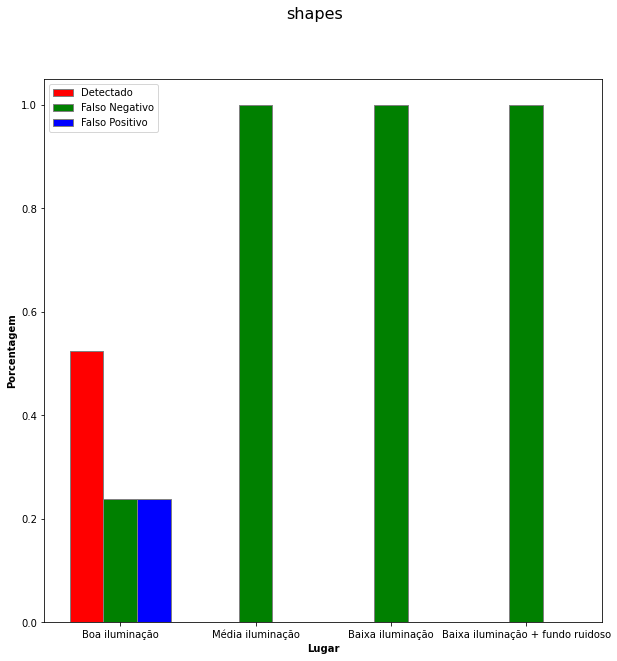

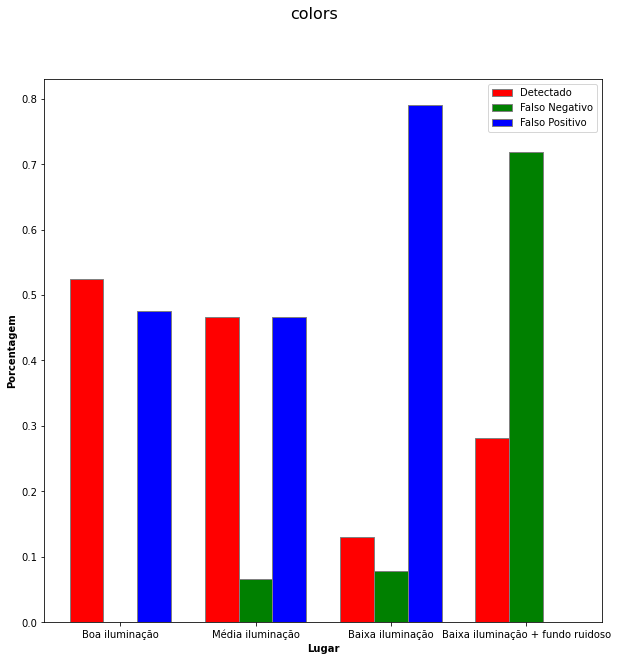

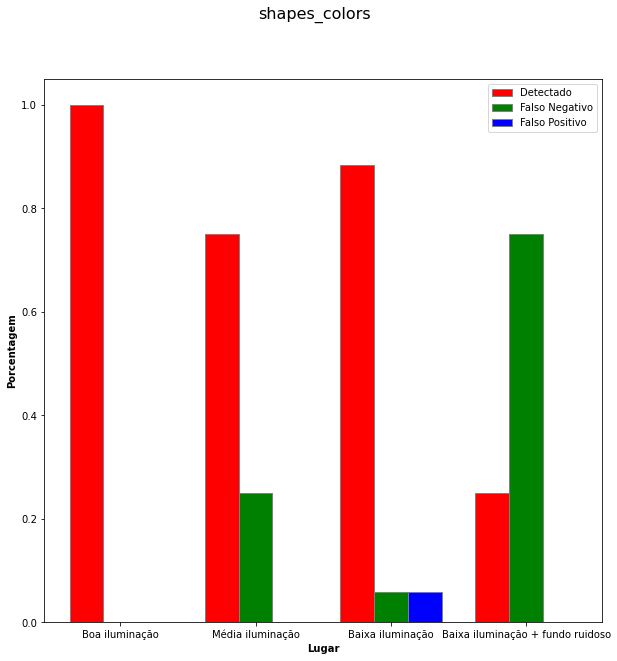

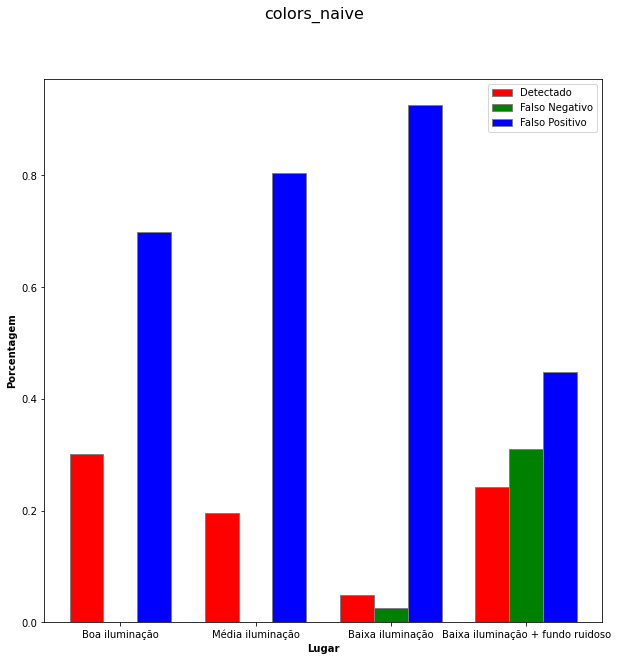

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 

# Gráfico com índices de detecção

for m in statistics:
    plt.figure(figsize=(10,10))
    plt.bar(range(1, 4*len(methods), 4), statistics[m]['detected'], color ='r', width =1, 
            edgecolor ='grey', label ='Detectado') 
    plt.bar(range(2, 4*len(methods), 4), statistics[m]['falseNegative'], color ='g', width = 1, 
            edgecolor ='grey', label ='Falso Negativo') 
    plt.bar(range(3, 4*len(methods), 4), statistics[m]['falsePositive'], color ='b', width = 1, 
            edgecolor ='grey', label ='Falso Positivo') 

    # Adding Xticks  
    plt.xlabel('Lugar', fontweight ='bold') 
    plt.ylabel('Porcentagem', fontweight ='bold') 
    plt.xticks([2, 6, 10 , 14],
               ['Boa iluminação', 'Média iluminação', 'Baixa iluminação', 'Baixa iluminação + fundo ruidoso']) 
    plt.suptitle(m, fontsize=16)
    plt.legend()
    plt.savefig('../algorithm_performance_data/graphs/'+m+'_detections.png')
    plt.show()

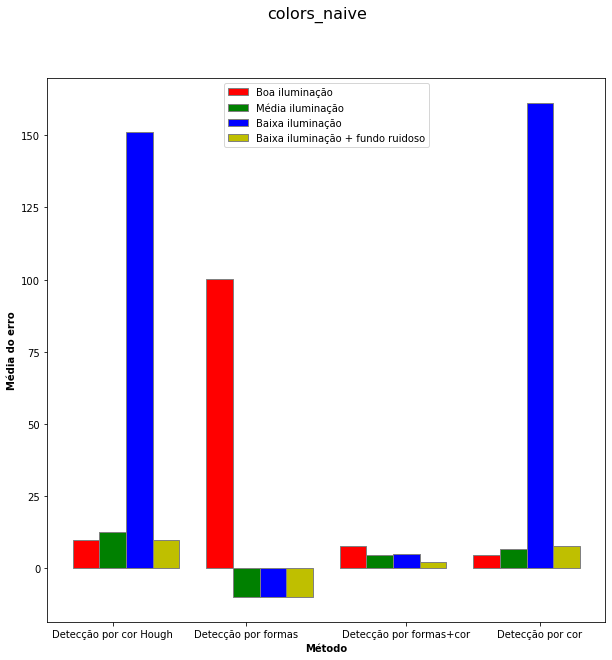

In [9]:
# Gráfico com distância média do local esperado

color = ['r', 'g', 'b', 'y']
label = ['Boa iluminação', 'Média iluminação', 'Baixa iluminação', 'Baixa iluminação + fundo ruidoso']

plt.figure(figsize=(10,10))
for i in range(4):
    plt.bar(range(i+1,20,5),[ statistics['colors']['distanceMean'][i],
                            statistics['shapes']['distanceMean'][i],
                            statistics['shapes_colors']['distanceMean'][i],
                            statistics['colors_naive']['distanceMean'][i]]
                            , color =color[i], width =1, edgecolor ='grey', label =label[i])

# Adding Xticks
plt.xlabel('Método', fontweight ='bold') 
plt.ylabel('Média do erro', fontweight ='bold') 
plt.xticks([2, 7, 13, 18], 
           ['Detecção por cor Hough', 'Detecção por formas', 'Detecção por formas+cor', 'Detecção por cor']) 
plt.suptitle(m, fontsize=16)   
plt.legend()
plt.savefig('../algorithm_performance_data/graphs/mean_error.png')
plt.show()

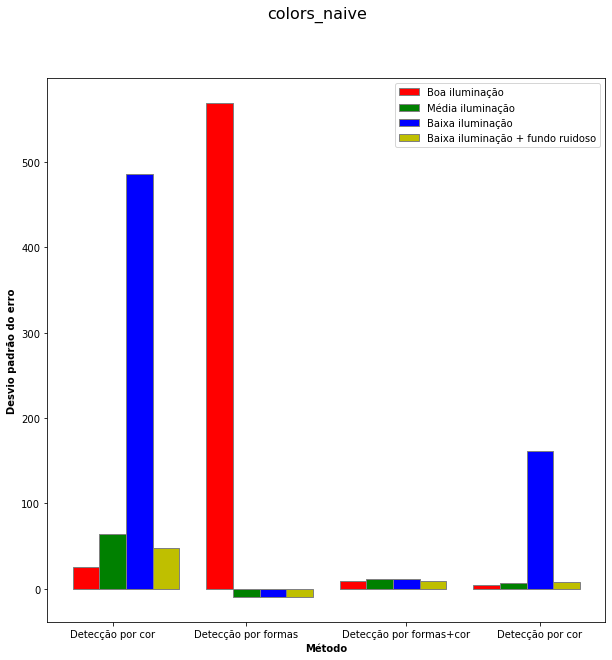

In [14]:
# Desvio padrão do erro da posição

color = ['r', 'g', 'b', 'y']
label = ['Boa iluminação', 'Média iluminação', 'Baixa iluminação', 'Baixa iluminação + fundo ruidoso']

plt.figure(figsize=(10,10))
for i in range(4):
    plt.bar(range(i+1,20,5),[ statistics['colors']['distanceDeviation'][i],
                            statistics['shapes']['distanceDeviation'][i],
                            statistics['shapes_colors']['distanceDeviation'][i],
                            statistics['colors_naive']['distanceMean'][i] ]
                            , color =color[i], width =1, edgecolor ='grey', label =label[i])

# Adding Xticks  
plt.xlabel('Método', fontweight ='bold') 
plt.ylabel('Desvio padrão do erro', fontweight ='bold') 
plt.xticks([2, 7, 13, 18], 
           ['Detecção por cor', 'Detecção por formas', 'Detecção por formas+cor', 'Detecção por cor']) 
plt.suptitle(m, fontsize=16)   
plt.legend()
plt.savefig('../algorithm_performance_data/graphs/standard_deviation.png')
plt.show()

In [2]:
# teste SIFT

#import numpy as np
#import cv2 as cv
#from scipy import *
#from pylab import *

#img = cv.imread('../img/papel3.jpg')
#gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
#sift = cv.SIFT_create()
#kp = sift.detect(gray,None)
#img=cv.drawKeypoints(gray,kp,img,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
#cv.imwrite('sift_keypoints.jpg',img)

True